# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from weather_api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

611


In [4]:
print(cities)

['tabas', 'cape town', 'bushenyi', 'new norfolk', 'itororo', 'saleaula', 'qaanaaq', 'macapa', 'ushuaia', 'arraial do cabo', 'faanui', 'grand-lahou', 'upernavik', 'hobart', 'marcona', 'illoqqortoormiut', 'mount gambier', 'balboa', 'lac du bonnet', 'vardo', 'shingu', 'rikitea', 'punta arenas', 'vaini', 'barrow', 'kodiak', 'samalaeulu', 'selma', 'gobabis', 'salalah', 'saint-philippe', 'sao filipe', 'hithadhoo', 'hermanus', 'ola', 'nantucket', 'akonolinga', 'port elizabeth', 'janesville', 'peniche', 'caraz', 'kavieng', 'avarua', 'tessalit', 'dikson', 'norman wells', 'busselton', 'thompson', 'mataura', 'bambous virieux', 'roald', 'omboue', 'ucluelet', 'sisimiut', 'georgetown', 'conde', 'ancud', 'butaritari', 'lentekhi', 'komsomolskiy', 'port alfred', 'alugan', 'puerto ayora', 'salinopolis', 'klyuchi', 'sambava', 'carnarvon', 'ilulissat', 'talnakh', 'vestmannaeyjar', 'lebork', 'severo-kurilsk', 'yulara', 'lata', 'anadyr', 'jamestown', 'klaksvik', 'bakel', 'srednekolymsk', 'albany', 'brewster

In [5]:
#variable to store weather latitudes
weather_lats= []
#variable for longitudes
weather_longs=[]
#variable to store weather temps
weather_data = []
#variable for wind speed
weather_wind=[]
#variable for weather string
weather_string=[]
#variable for city name
city_names=[]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#setting units to imperial
units = "imperial"
#building url for api call
url = "http://api.openweathermap.org/data/2.5/weather?"
#building search params for api
query_url = f"{url}appid={api_key}&units={units}&q="

#storing api response 'response'
#response = requests.get(query_url +city, time.sleep(1)).json()
#making for loop to loop through all cities 
for city in cities:
    #making api call
    try:
        response = requests.get(query_url + city ,time.sleep(1)).json()
        #storing weather data
        weather_data.append(response['main'])
        city_names.append(response['name'])
        weather_lats.append(response['coord']['lat'])
        weather_longs.append(response['coord']['lon'])
        weather_wind.append(response['wind']['speed'])
        weather_string.append(response['weather'][0])
        print("City Found: ", city)
        
    except:
        #print city not found
        if city != response:
            print("City not found: ", city)





City Found:  tabas
City Found:  cape town
City Found:  bushenyi
City Found:  new norfolk
City Found:  itororo
City not found:  saleaula
City Found:  qaanaaq
City Found:  macapa
City Found:  ushuaia
City Found:  arraial do cabo
City Found:  faanui
City Found:  grand-lahou
City Found:  upernavik
City Found:  hobart
City not found:  marcona
City not found:  illoqqortoormiut
City Found:  mount gambier
City Found:  balboa
City Found:  lac du bonnet
City Found:  vardo
City Found:  shingu
City Found:  rikitea
City Found:  punta arenas
City Found:  vaini
City Found:  barrow
City Found:  kodiak
City not found:  samalaeulu
City Found:  selma
City Found:  gobabis
City Found:  salalah
City Found:  saint-philippe
City Found:  sao filipe
City Found:  hithadhoo
City Found:  hermanus
City Found:  ola
City Found:  nantucket
City Found:  akonolinga
City Found:  port elizabeth
City Found:  janesville
City Found:  peniche
City Found:  caraz
City Found:  kavieng
City Found:  avarua
City Found:  tessalit
Ci

City Found:  quatre cocos
City Found:  bukama
City Found:  manthani
City Found:  candolim
City Found:  agadez
City not found:  alotau
City Found:  coquimbo
City Found:  evensk
City Found:  ishigaki
City not found:  tome-acu
City Found:  naze
City Found:  beringovskiy
City Found:  kindersley
City Found:  santa lucia
City Found:  pirae
City Found:  catamarca
City Found:  halden
City Found:  buraydah
City Found:  tazovskiy
City Found:  boa vista
City Found:  carnaiba
City Found:  meiganga
City Found:  saint-augustin
City Found:  port lincoln
City Found:  mahanje
City Found:  phuthaditjhaba
City Found:  chichli
City Found:  nadym
City Found:  pinawa
City Found:  mani
City Found:  liverpool
City Found:  labuhan
City Found:  broken hill
City Found:  port hawkesbury
City Found:  kuching
City Found:  cartagena
City Found:  saint anthony
City Found:  birao
City Found:  la ronge
City Found:  bandipur
City Found:  luganville
City Found:  lagoa
City Found:  hualmay
City Found:  big bend
City Found

In [7]:
#making dataframes out of our variables
summary= pd.DataFrame({'city name':city_names,'lat':weather_lats,'long':weather_longs,'wind speed': weather_wind})
summary

,city name,lat,long,wind speed
0,Tabas,33.5959,56.9244,6.91
1,Cape Town,-33.9258,18.4232,18.41
2,Bushenyi,-0.5853,30.2114,3.06
3,New Norfolk,-42.7826,147.0587,1.99
4,Itororó,-15.1169,-40.0703,2.59
...,...,...,...,...
564,Sosnovo-Ozerskoye,52.5249,111.5418,7.56
565,Iskateley,67.6803,53.1512,16.49
566,Kiama,-34.6833,150.8667,1.99
567,Ndélé,8.4109,20.6473,6.22


In [8]:
weather=pd.DataFrame(weather_data)
weather

,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level
0,59.00,50.85,59.00,59.00,1016,29,NaN,NaN
1,66.25,56.89,64.99,68.00,1016,63,NaN,NaN
2,63.91,60.64,63.91,63.91,1012,47,1012.0,847.0
3,50.94,47.59,48.00,54.00,1014,66,NaN,NaN
4,79.70,88.05,79.70,79.70,1010,83,1010.0,982.0
...,...,...,...,...,...,...,...,...
564,-1.39,-12.06,-1.39,-1.39,1028,93,1028.0,906.0
565,-17.27,-33.41,-17.27,-17.27,1005,87,1005.0,1004.0
566,64.99,67.15,64.99,64.99,1014,84,NaN,NaN
567,70.65,63.12,70.65,70.65,1010,21,1010.0,953.0


In [9]:
summary=summary.reset_index()

In [10]:
weather=weather.reset_index()

In [11]:
complete_df= weather.merge(summary,how='inner', on='index')


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
clean_data=complete_df.drop(['index'],axis=1)

In [13]:
clean_data

,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed
0,59.00,50.85,59.00,59.00,1016,29,NaN,NaN,Tabas,33.5959,56.9244,6.91
1,66.25,56.89,64.99,68.00,1016,63,NaN,NaN,Cape Town,-33.9258,18.4232,18.41
2,63.91,60.64,63.91,63.91,1012,47,1012.0,847.0,Bushenyi,-0.5853,30.2114,3.06
3,50.94,47.59,48.00,54.00,1014,66,NaN,NaN,New Norfolk,-42.7826,147.0587,1.99
4,79.70,88.05,79.70,79.70,1010,83,1010.0,982.0,Itororó,-15.1169,-40.0703,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1.39,-12.06,-1.39,-1.39,1028,93,1028.0,906.0,Sosnovo-Ozerskoye,52.5249,111.5418,7.56
565,-17.27,-33.41,-17.27,-17.27,1005,87,1005.0,1004.0,Iskateley,67.6803,53.1512,16.49
566,64.99,67.15,64.99,64.99,1014,84,NaN,NaN,Kiama,-34.6833,150.8667,1.99
567,70.65,63.12,70.65,70.65,1010,21,1010.0,953.0,Ndélé,8.4109,20.6473,6.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
complete_df[complete_df['humidity']>100]

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed


In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature vs. City Latitude 2/5/2021')

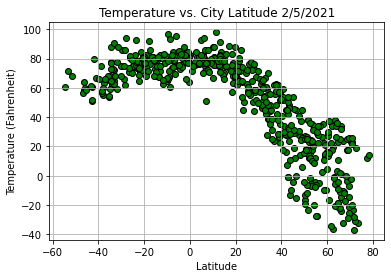

In [18]:

plt.scatter(clean_data['lat'], clean_data['temp'],facecolors="g", cmap="RdYlGn",edgecolors="black")
plt.grid()
plt.gray()
plt.ylabel('Temperature (Fahrenheit)')
plt.xlabel('Latitude')
plt.title('Temperature vs. City Latitude 2/5/2021')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity vs. City Latitude 2/5/21')

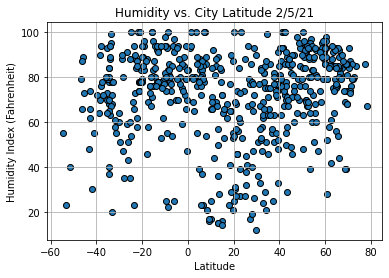

In [19]:
plt.scatter(clean_data['lat'],clean_data['humidity'],edgecolors='black')
plt.ylabel('Humidity Index (Fahrenheit)')
plt.xlabel('Latitude')
plt.grid()
plt.title('Humidity vs. City Latitude 2/5/21')

## Latitude vs. Cloudiness Plot

In [20]:
cloudiness=pd.DataFrame(weather_string)
copy=clean_data.copy()
cc=cloudiness.reset_index()

c=copy.reset_index()
clouds=c.merge(cc,on='index')
clouds

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed,id,main,description,icon
0,0,59.00,50.85,59.00,59.00,1016,29,NaN,NaN,Tabas,33.5959,56.9244,6.91,804,Clouds,overcast clouds,04n
1,1,66.25,56.89,64.99,68.00,1016,63,NaN,NaN,Cape Town,-33.9258,18.4232,18.41,800,Clear,clear sky,01n
2,2,63.91,60.64,63.91,63.91,1012,47,1012.0,847.0,Bushenyi,-0.5853,30.2114,3.06,801,Clouds,few clouds,02n
3,3,50.94,47.59,48.00,54.00,1014,66,NaN,NaN,New Norfolk,-42.7826,147.0587,1.99,800,Clear,clear sky,01d
4,4,79.70,88.05,79.70,79.70,1010,83,1010.0,982.0,Itororó,-15.1169,-40.0703,2.59,501,Rain,moderate rain,10d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,-1.39,-12.06,-1.39,-1.39,1028,93,1028.0,906.0,Sosnovo-Ozerskoye,52.5249,111.5418,7.56,804,Clouds,overcast clouds,04n
565,565,-17.27,-33.41,-17.27,-17.27,1005,87,1005.0,1004.0,Iskateley,67.6803,53.1512,16.49,804,Clouds,overcast clouds,04n
566,566,64.99,67.15,64.99,64.99,1014,84,NaN,NaN,Kiama,-34.6833,150.8667,1.99,803,Clouds,broken clouds,04d
567,567,70.65,63.12,70.65,70.65,1010,21,1010.0,953.0,Ndélé,8.4109,20.6473,6.22,802,Clouds,scattered clouds,03n


In [21]:
cloudscover=clouds['description'].value_counts()
#plt.scatter(clouds['lat'],clouds['description'])
#plt.xlabel('latitude')
#plt.grid()
#plt.title('weather vs. latitude 2/5/21')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'wind speed vs. latitude 2/5/2021')

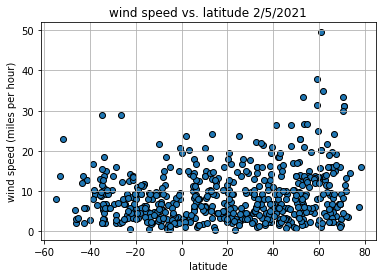

In [26]:
plt.scatter(clean_data['lat'],clean_data['wind speed'],edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('wind speed (miles per hour)')
plt.grid()
plt.title('wind speed vs. latitude 2/5/2021')

## Linear Regression

In [23]:
clouds

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed,id,main,description,icon
0,0,59.00,50.85,59.00,59.00,1016,29,NaN,NaN,Tabas,33.5959,56.9244,6.91,804,Clouds,overcast clouds,04n
1,1,66.25,56.89,64.99,68.00,1016,63,NaN,NaN,Cape Town,-33.9258,18.4232,18.41,800,Clear,clear sky,01n
2,2,63.91,60.64,63.91,63.91,1012,47,1012.0,847.0,Bushenyi,-0.5853,30.2114,3.06,801,Clouds,few clouds,02n
3,3,50.94,47.59,48.00,54.00,1014,66,NaN,NaN,New Norfolk,-42.7826,147.0587,1.99,800,Clear,clear sky,01d
4,4,79.70,88.05,79.70,79.70,1010,83,1010.0,982.0,Itororó,-15.1169,-40.0703,2.59,501,Rain,moderate rain,10d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,-1.39,-12.06,-1.39,-1.39,1028,93,1028.0,906.0,Sosnovo-Ozerskoye,52.5249,111.5418,7.56,804,Clouds,overcast clouds,04n
565,565,-17.27,-33.41,-17.27,-17.27,1005,87,1005.0,1004.0,Iskateley,67.6803,53.1512,16.49,804,Clouds,overcast clouds,04n
566,566,64.99,67.15,64.99,64.99,1014,84,NaN,NaN,Kiama,-34.6833,150.8667,1.99,803,Clouds,broken clouds,04d
567,567,70.65,63.12,70.65,70.65,1010,21,1010.0,953.0,Ndélé,8.4109,20.6473,6.22,802,Clouds,scattered clouds,03n


In [24]:
#setting max hemisphere temp
max_temp= clouds[clouds['lat']>0]
max_temp

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed,id,main,description,icon
0,0,59.00,50.85,59.00,59.00,1016,29,NaN,NaN,Tabas,33.5959,56.9244,6.91,804,Clouds,overcast clouds,04n
5,5,12.27,3.06,12.27,12.27,1042,86,1042.0,1038.0,Qaanaaq,77.4840,-69.3632,5.99,803,Clouds,broken clouds,04n
6,6,82.40,82.74,82.40,82.40,1010,83,NaN,NaN,Macapá,0.0389,-51.0664,19.57,803,Clouds,broken clouds,04d
10,10,79.97,85.33,79.97,79.97,1010,88,1010.0,1009.0,Grand-Lahou,5.1367,-5.0242,10.00,802,Clouds,scattered clouds,03n
11,11,18.93,11.39,18.93,18.93,1034,80,1034.0,1034.0,Upernavik,72.7868,-56.1549,3.60,802,Clouds,scattered clouds,03n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,563,-9.71,-18.26,-9.71,-9.71,1021,88,1021.0,985.0,Chuguyevka,44.1653,133.8633,3.29,804,Clouds,overcast clouds,04n
564,564,-1.39,-12.06,-1.39,-1.39,1028,93,1028.0,906.0,Sosnovo-Ozerskoye,52.5249,111.5418,7.56,804,Clouds,overcast clouds,04n
565,565,-17.27,-33.41,-17.27,-17.27,1005,87,1005.0,1004.0,Iskateley,67.6803,53.1512,16.49,804,Clouds,overcast clouds,04n
567,567,70.65,63.12,70.65,70.65,1010,21,1010.0,953.0,Ndélé,8.4109,20.6473,6.22,802,Clouds,scattered clouds,03n


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8699061713474039


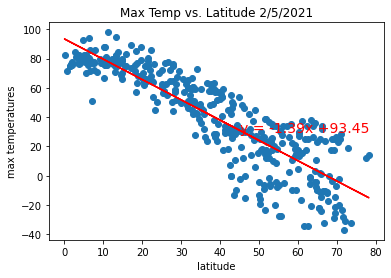

In [42]:
#plotting north hemisphere max temps
maxtemp=max_temp['temp_max']
plt.scatter(max_temp['lat'],maxtemp)
plt.xlabel('latitude')
plt.ylabel('max temperatures')
plt.title('Max Temp vs. Latitude 2/5/2021')
#linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(max_temp['lat'],maxtemp)
regress_values = max_temp['lat']*slope +intercept
line_eq = "y = "+ str(round(slope,2))+ "x +" + str(round(intercept,2))
plt.plot(max_temp['lat'],regress_values,"r-")
plt.annotate(line_eq, (45,30),fontsize=14, color="red")
print(f'The r-value is {rvalue}')

In [39]:
#we can see the relationship of temperatures decrease as the latitudes increase from the graph above


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [320]:
#in this graph above, we can see a trend of increasing temperatures as the latitude of cities decrease

The rvalue is 0.5324644355237886


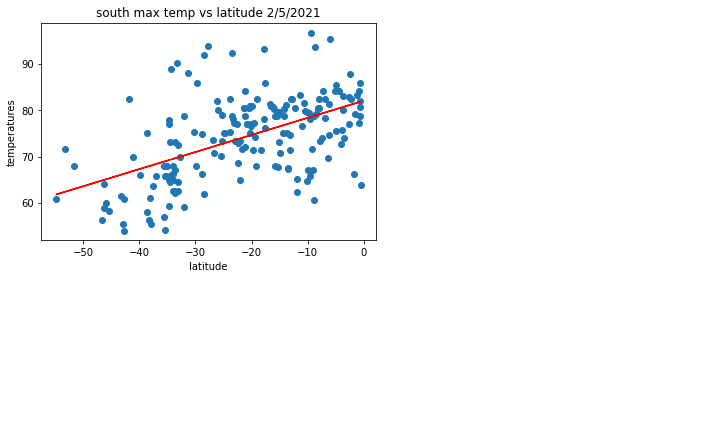

In [69]:
#setting variables to graph south hem max temps
south=clouds[clouds['lat']<0]
#graphing south hem max temps
plt.scatter(south['lat'],south['temp_max'])
plt.xlabel('latitude')
plt.ylabel('temperatures')
plt.title('south max temp vs latitude 2/5/2021')
#performing liner regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(south['lat'],south['temp_max'])
regress_values = south['lat']*slope +intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['lat'], regress_values, "r-")
plt.annotate(line_eq,(40,15), fontsize=14,color="red")
print(f'The rvalue is {rvalue}' )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [293]:
clouds

,index,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,city name,lat,long,wind speed,id,main,description,icon
0,0,21.20,2.86,21.20,21.20,1014,79,NaN,NaN,Iqaluit,63.7506,-68.5145,23.02,601,Snow,snow,13d
1,1,56.91,56.16,56.91,56.91,1021,75,1021.0,1015.0,Mataura,-46.1927,168.8643,1.05,801,Clouds,few clouds,02d
2,2,73.65,61.52,73.65,73.65,1012,50,1012.0,1008.0,Lüderitz,-26.6481,15.1594,23.64,800,Clear,clear sky,01n
3,3,63.46,63.50,62.01,64.99,994,94,NaN,NaN,Hobart,-42.8794,147.3294,6.91,501,Rain,moderate rain,10d
4,4,30.99,24.93,27.00,36.00,1013,81,NaN,NaN,Pleasant Grove,40.3641,-111.7385,3.00,601,Snow,snow,13d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,30.24,12.88,28.40,32.00,1029,64,NaN,NaN,Havøysund,70.9963,24.6622,21.85,600,Snow,light snow,13n
573,573,64.92,56.73,64.92,64.92,1020,26,1020.0,994.0,Bani Walid,31.7566,13.9942,7.49,804,Clouds,overcast clouds,04n
574,574,7.68,-3.32,7.68,7.68,997,95,997.0,981.0,Shar'ya,58.3686,45.5144,8.90,804,Clouds,overcast clouds,04n
575,575,55.90,52.09,55.90,55.90,1024,58,1024.0,1020.0,Jalu,29.0331,21.5482,3.29,800,Clear,clear sky,01n


The rvalue is 0.28915192300705844


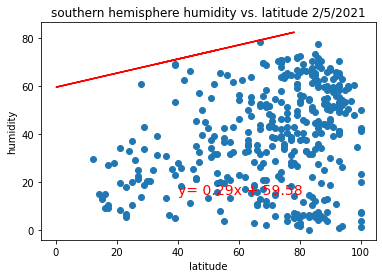

In [60]:
#plotting northern hemisphere humidity 
north_humidity=clouds[clouds['lat']>0]
plt.scatter(north_humidity['humidity'],north_humidity['lat'])
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.title('southern hemisphere humidity vs. latitude 2/5/2021')
#linear regression values
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_humidity['lat'],north_humidity['humidity'])

regress_values = north_humidity['lat']*slope +intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_humidity['lat'], regress_values, "r-")
plt.annotate(line_eq,(40,15), fontsize=14,color="red")
print(f'The rvalue is {rvalue}' )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is 0.23236603626290128


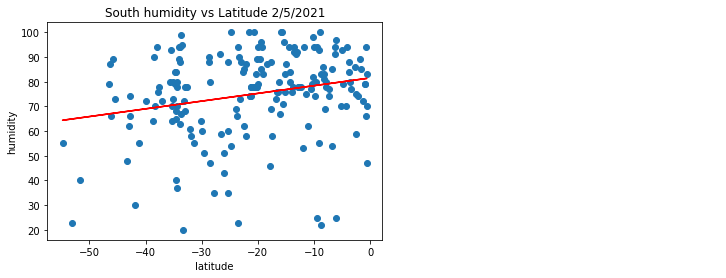

In [63]:
#plotting southern hemisphere humidity 
south_humidity=clouds[clouds['lat']<0]
plt.scatter(south_humidity['lat'],south_humidity['humidity'])
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.title('South humidity vs Latitude 2/5/2021')
#linear regression values
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_humidity['lat'],south_humidity['humidity'])



regress_values = south_humidity['lat']*slope +intercept
line_equ = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_humidity['lat'], regress_values, "r-")
plt.annotate(line_equ,(40,15), fontsize=14,color="red")
print(f'The rvalue is {rvalue}' )

In [ ]:
#we can see a trend forming with an increased latitude, the humidity also increases

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is 0.16760570591792479


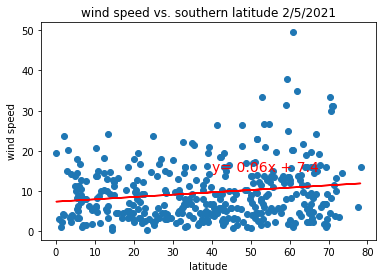

In [65]:
#plotting southern hemisphere humidity 
north_wind=clouds[clouds['lat']>0]
plt.scatter(north_wind['lat'],north_wind['wind speed'])
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.title('wind speed vs. southern latitude 2/5/2021')
#linear regression values
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_wind['lat'],north_wind['wind speed'])


regress_values = north_wind['lat']*slope +intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_wind['lat'], regress_values, "r-")
plt.annotate(line_eq,(40,15), fontsize=14,color="red")
print(f'The rvalue is {rvalue}' )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is -0.18486557758156522


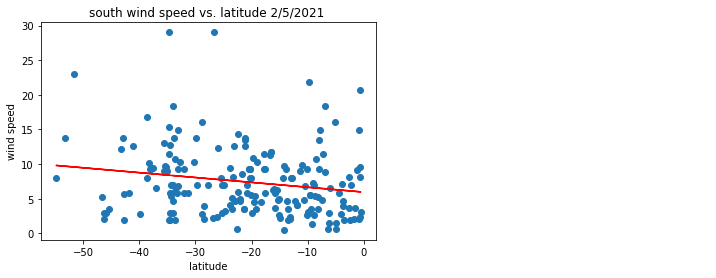

In [68]:
#plotting southern hemisphere humidity 
south_wind=clouds[clouds['lat']<0]
plt.scatter(south_wind['lat'],south_wind['wind speed'])
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.title('south wind speed vs. latitude 2/5/2021 ')
#linear regression values
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_wind['lat'],south_wind['wind speed'])

regress_values = south_wind['lat']*slope +intercept
line= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_wind['lat'], regress_values, "r-")
plt.annotate(line,(40,15), fontsize=14,color="red")
print(f'The rvalue is {rvalue}' )

In [ ]:
#there is a negative trend with wind speed when the latitude increases 

In [327]:
import os
import csv

In [330]:
clouds.to_csv('weather_data.csv', header=True,index=True)